In [1]:
#this is a combination of LSTM		BIRNN		LSTM-LSTM		BiRNN-BIRNN		BiRNN-LSTM
#choose 3 best model from 5 models. Voting method
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

seed_value= 1234
# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
from numpy import array
from numpy import asarray
import numpy as np
import sklearn
from matplotlib import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

#Setting GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=4096)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)
    
import warnings
warnings.filterwarnings("ignore")


##End setting for random state.
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

def Format_output(y_train_pred):
    res= np.array([])
    for x in y_train_pred:
        if x>=0.5:
            res= np.append(res, 1)
        else: 
            res= np.append(res, 0)
    res= np.reshape(res,(res.shape[0],1))
    return res

#1. LSTM model
def My_LSTM(nodes, X_train, y_train, X_Val, y_Val,model_name):
    import os
    os.environ['PYTHONHASHSEED']=str(seed_value)
    
    import random
    random.seed(seed_value)
    
    import numpy as np
    np.random.seed(seed_value)
    
    tf.random.set_seed(seed_value)
    
    
    es = tf.keras.callbacks.EarlyStopping(
                    monitor='val_loss', patience=50,
                    restore_best_weights =True,verbose=0)
    mc = tf.keras.callbacks.ModelCheckpoint(
                             filepath=model_name,
                             monitor='val_loss', 
                             save_best_only=True)
    callback = [es,mc]
    opt = tf.keras.optimizers.Adam(learning_rate=0.05)

    my_model = tf.keras.Sequential()
    my_model.add(tf.keras.layers.LSTM(units = nodes,input_shape = (X_train.shape[1],X_train.shape[2])))
    my_model.add(tf.keras.layers.Dropout(0.2))
    my_model.add(tf.keras.layers.Dense(20))
    my_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    my_model.compile(loss = 'mse',
     optimizer = opt, 
     metrics = [tf.keras.metrics.BinaryAccuracy()])

    #my_model.summary()
    my_model.fit(X_train,y_train,
                    validation_data=(X_Val, y_Val),
                    batch_size = 500,epochs = 300,
                    callbacks=callback, verbose=0)
    return my_model

#2. BiRNN model
def My_BiRNN(nodes, X_train, y_train, X_Val, y_Val,model_name):
    import os
    os.environ['PYTHONHASHSEED']=str(seed_value)
    
    import random
    random.seed(seed_value)
    
    import numpy as np
    np.random.seed(seed_value)
    
    tf.random.set_seed(seed_value)
    
    
    es = tf.keras.callbacks.EarlyStopping(
                    monitor='val_loss', patience=50,
                    restore_best_weights =True,verbose=0)
    mc = tf.keras.callbacks.ModelCheckpoint(
                             filepath=model_name,
                             monitor='val_loss', 
                             save_best_only=True)
    callback = [es,mc]
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)

    my_model = tf.keras.Sequential()
    my_model.add(tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(
            units = nodes,
            input_shape = (X_train.shape[1],X_train.shape[2])))
        )
    my_model.add(tf.keras.layers.Dropout(0.2))
    my_model.add(tf.keras.layers.Dense(20))
    my_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    my_model.compile(loss = 'mse',
     optimizer = opt, 
     metrics = [tf.keras.metrics.BinaryAccuracy()])

    #my_model.summary()
    my_model.fit(X_train,y_train,
                    validation_data=(X_Val, y_Val),
                    batch_size = 500,epochs = 300,
                    callbacks=callback, verbose=0)
    return my_model

#3. LSTM-LSTM model
def My_LSTM_LSTM(nodes, X_train, y_train, X_Val, y_Val,model_name):
    import os
    os.environ['PYTHONHASHSEED']=str(seed_value)
    
    import random
    random.seed(seed_value)
    
    import numpy as np
    np.random.seed(seed_value)
    
    tf.random.set_seed(seed_value)
    
    
    es = tf.keras.callbacks.EarlyStopping(
                    monitor='val_loss', patience=50,
                    restore_best_weights =True,verbose=0)
    mc = tf.keras.callbacks.ModelCheckpoint(
                             filepath=model_name,
                             monitor='val_loss', 
                             save_best_only=True)
    callback = [es,mc]
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)

    my_model = tf.keras.Sequential()
    my_model.add(tf.keras.layers.LSTM(units = nodes,input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences=True))
    my_model.add(tf.keras.layers.Dropout(0.2))
    my_model.add(tf.keras.layers.LSTM(units = 50,input_shape = (X_train.shape[1],X_train.shape[2])))
    my_model.add(tf.keras.layers.Dense(10))
    my_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    my_model.compile(loss = 'mse',
     optimizer = opt, 
     metrics = [tf.keras.metrics.BinaryAccuracy()])

    #my_model.summary()
    my_model.fit(X_train,y_train,
                    validation_data=(X_Val, y_Val),
                    batch_size = 500,epochs = 300,
                    callbacks=callback, verbose=0)
    return my_model

#4. BiRNN-BiRNNmodel
def My_BiRNN_BiRNN(nodes, X_train, y_train, X_Val, y_Val,model_name):
    import os
    os.environ['PYTHONHASHSEED']=str(seed_value)
    
    import random
    random.seed(seed_value)
    
    import numpy as np
    np.random.seed(seed_value)
    
    tf.random.set_seed(seed_value)
    
    
    es = tf.keras.callbacks.EarlyStopping(
                    monitor='val_loss', patience=50,
                    restore_best_weights =True,verbose=0)
    mc = tf.keras.callbacks.ModelCheckpoint(
                             filepath=model_name,
                             monitor='val_loss', 
                             save_best_only=True)
    callback = [es,mc]
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)

    my_model = tf.keras.Sequential()
    my_model.add(tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(
            units = nodes,
            input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences=True))
        )
    my_model.add(tf.keras.layers.Dropout(0.2))
    my_model.add(tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(
            units = 50,
            input_shape = (X_train.shape[1],X_train.shape[2])))
        )
    my_model.add(tf.keras.layers.Dense(10))
    my_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    my_model.compile(loss = 'mse',
     optimizer = opt, 
     metrics = [tf.keras.metrics.BinaryAccuracy()])

    #my_model.summary()
    my_model.fit(X_train,y_train,
                    validation_data=(X_Val, y_Val),
                    batch_size = 500,epochs = 300,
                    callbacks=callback, verbose=0)
    return my_model

#5. BiRNN-LSTM
def My_BiRNN_LSTM(nodes, X_train, y_train, X_Val, y_Val,model_name):
    import os
    os.environ['PYTHONHASHSEED']=str(seed_value)
    
    import random
    random.seed(seed_value)
    
    import numpy as np
    np.random.seed(seed_value)
    
    tf.random.set_seed(seed_value)
    
    
    es = tf.keras.callbacks.EarlyStopping(
                    monitor='val_loss', patience=50,
                    restore_best_weights =True,verbose=0)
    mc = tf.keras.callbacks.ModelCheckpoint(
                             filepath=model_name,
                             monitor='val_loss', 
                             save_best_only=True)
    callback = [es,mc]
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)

    my_model = tf.keras.Sequential()
    my_model.add(tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(
            units = nodes,
            input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences=True))
        )
    my_model.add(tf.keras.layers.Dropout(0.2))
    my_model.add(tf.keras.layers.LSTM(units = 50,input_shape = (X_train.shape[1],X_train.shape[2])))
    my_model.add(tf.keras.layers.Dense(10))
    my_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    my_model.compile(loss = 'mse',
     optimizer = opt, 
     metrics = [tf.keras.metrics.BinaryAccuracy()])

    #my_model.summary()
    my_model.fit(X_train,y_train,
                    validation_data=(X_Val, y_Val),
                    batch_size = 500,epochs = 300,
                    callbacks=callback, verbose=0)
    return my_model

class My_Model(tf.keras.Model):
    def __init__(self,):
        
        super().__init__()
        import os
        os.environ['PYTHONHASHSEED']=str(seed_value)

        import random
        random.seed(seed_value)

        import numpy as np
        np.random.seed(seed_value)

        tf.random.set_seed(seed_value)

        self.Models = []
        
        #train accuracy.
        self.Precisions_train = []
        self.Recalls_train   = []
        self.F_scores_train  = []
        self.AUCs_train      = []
        #Test accuracy.
        self.Precisions_test = []
        self.Recalls_test   = []
        self.F_scores_test  = []
        self.AUCs_test      = []
        
    
    def run_main(self,i,x_train, y_train, x_test, y_test):
        List_Nodes= [16,32,64,128,256]
        temp_auc = -1
        temp_Model_LSTM = None
        for nodes in List_Nodes:
            if (i==1):
                Model = My_LSTM(nodes, x_train, y_train, x_test, y_test,'temp.h5')
                print('LSTM model with ',nodes,' nodes stop after ',len(Model.history.history['loss']), ' epochs')
            
            elif(i==2):
                Model = My_BiRNN(nodes, x_train, y_train, x_test, y_test,'temp.h5')
                print('BiRNN model with ',nodes,' nodes stop after ',len(Model.history.history['loss']), ' epochs')               
            
            elif(i==3):
                
                Model = My_LSTM_LSTM(nodes, x_train, y_train, x_test, y_test,'temp.h5')
                print('LSTM_LSTM model with ',nodes,' nodes stop after ',len(Model.history.history['loss']), ' epochs')               
                
            elif(i==4):

                Model = My_BiRNN_BiRNN(nodes, x_train, y_train, x_test, y_test,'temp.h5')
                print('BiRNN_BiRNN model with ',nodes,' nodes stop after ',len(Model.history.history['loss']), ' epochs')               
                
            elif(i==5):

                Model = My_BiRNN_LSTM(nodes, x_train, y_train, x_test, y_test,'temp.h5')
                print('BiRNN_LSTM model with ',nodes,' nodes stop after ',len(Model.history.history['loss']), ' epochs')               
        
                pass
            else:
                print('i parameter is from 1 to 5.')
            y_pred = Format_output(Model.predict(x_test))
            fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
            AUC_test = metrics.auc(fpr, tpr)
            print('AUC = ',AUC_test)
            
            if(AUC_test > temp_auc):
                print('Current status: ',nodes,' nodes')
                temp_Model_LSTM = Model
                temp_auc = AUC_test
        #compute metrics for lstm model
        #train
        y_train_pred = Format_output(temp_Model_LSTM.predict(x_train))
        precision_train,recall_train,f1Score_train,_ = precision_recall_fscore_support(y_train, y_train_pred,average='binary')
        fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred)
        AUC_train = metrics.auc(fpr, tpr)
        self.Precisions_train.append(precision_train)
        self.Recalls_train.append(recall_train)
        self.F_scores_train.append(f1Score_train)
        self.AUCs_train.append(AUC_train)
        #test
        y_pred = Format_output(temp_Model_LSTM.predict(x_test))
        precision_test,recall_test,f1Score_test,_ = precision_recall_fscore_support(y_test, y_pred,average='binary')
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
        AUC_test = metrics.auc(fpr, tpr)
        self.Precisions_test.append(precision_test)
        self.Recalls_test.append(recall_test)
        self.F_scores_test.append(f1Score_test)
        self.AUCs_test.append(AUC_test)
        
        import os
        os.remove('temp.h5')
        self.Models.append(temp_Model_LSTM)
        
    #training all models.
    def My_fit(self,x_train, y_train, x_test, y_test):       
        #LSTM
        print('\n1. LSTM Model: ')
        self.run_main(1,x_train, y_train, x_test, y_test)
        #BiRNN
        print('\n2. BiRNN Model: ')
        self.run_main(2,x_train, y_train, x_test, y_test)
        #LSTM_LSTM
        print('\n3. LSTM_LSTM Model: ')
        self.run_main(3,x_train, y_train, x_test, y_test)
        #BiRNN_BiRNN
        print('\n4. BiRNN_BiRNN Model: ')
        self.run_main(4,x_train, y_train, x_test, y_test)
        #BiRNN-LSTM
        print('\n5. BiRNN-LSTM Model: ')
        self.run_main(5,x_train, y_train, x_test, y_test)
        
        #Chose top 3 models to predict in the future.
        #get top 3 models
        L1= np.array(self.AUCs_train)
        index = numpy.argsort(L1)[2:]
        Models2 = []
        for i in index:
            Models2.append(self.Models[i])
            
        self.Models = Models2 
        
        print('Done Training')

    #Predict all models.
    def My_fit(self,x_train, y_train, x_test, y_test):       
        #LSTM
        print('\n1. LSTM Model: ')
        self.run_main(1,x_train, y_train, x_test, y_test)
        #BiRNN
        print('\n2. BiRNN Model: ')
        self.run_main(2,x_train, y_train, x_test, y_test)
        #LSTM_LSTM
        print('\n3. LSTM_LSTM Model: ')
        self.run_main(3,x_train, y_train, x_test, y_test)
        #BiRNN_BiRNN
        print('\n4. BiRNN_BiRNN Model: ')
        self.run_main(4,x_train, y_train, x_test, y_test)
        #BiRNN-LSTM
        print('\n5. BiRNN-LSTM Model: ')
        self.run_main(5,x_train, y_train, x_test, y_test)
        
        #Chose top 3 models to predict in the future.
        #get top 3 models
        L1= np.array(self.AUCs_train)
        index = numpy.argsort(L1)[2:]
        Models2 = []
        for i in index:
            Models2.append(self.Models[i])
            
        self.Models = Models2 
        
        print('Done Training')

    #Predict all models.
    def predict(self,x_data):     

        #compute the average for train and test. 
        y_preds = []
        for model in self.Models:
            #predict and compute the average values. 
            y_pred = model.predict(x_data)
            y_preds.append(y_pred)
        
        #Format_output(
        #do it here
       
        y_pred =(y_preds[0]+y_preds[1]+y_preds[2])/3
        
        return y_pred
    
    def save(self, Filename="EnsembleDL"):
        i=1
        for model in self.Models:
            Name = Filename+'_model'+str(i)+'.h5'
            model.save(Name)
            i+=1
            print('Write submodel ',1,' to ', Name)
        print('Save Ensemble DL Done...')

def Load_EnsembleDL(Filenames): #Filenames is include all submodel files
    EnsembleDL = My_Model()
    i=1
    Models = []
    for filename in Filenames:
        model = keras.models.load_model(filename)
        EnsembleDL.Models.append(model)
        print('Load submodel ',i,' from ', filename)
        i+=1
    print('Load Ensemble DL Done...')
    return EnsembleDL
                      
def Run(Train_Path,Test_Path,model_name='None.h5'):

    #def run_GBM(Train_Path, Test_Path):
    Train = pd.read_csv(Train_Path)
    Test  = pd.read_csv(Test_Path)
    Train = Train.dropna()
    Test  = Test.dropna()

    New_data = [Train,Test]
    New_data = pd.concat(New_data)

    scaler = MinMaxScaler()
    New_data = scaler.fit_transform(New_data)

    Train =New_data[0:Train.shape[0],:]
    Test = New_data[(Train.shape[0]):,:]

    x_train = Train[:,0:-1]
    y_train = Train[:,-1]
    
    x_test = Test[:,0:-1]
    y_test = Test[:,-1]

    print( 'size before appling reshape: ',x_train.shape,y_train.shape,x_test.shape, y_test.shape)
    #minmax scaler for training and testing
    
    x_train = np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))
    y_train = np.reshape(y_train,(y_train.shape[0],1))

    x_test = np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))
    y_test = np.reshape(y_test,(y_test.shape[0],1))
    print( 'size after appling reshape: ',x_train.shape,y_train.shape,x_test.shape, y_test.shape)


    #create model.
    #Ensemble_DL = My_Model()
    Ensemble_DL.My_fit(x_train, y_train, x_test, y_test)
    
    print(Ensemble_DL.Precisions_train)
    print(Ensemble_DL.Recalls_train)
    print(Ensemble_DL.F_scores_train)
    print(Ensemble_DL.AUCs_train)
    print(Ensemble_DL.Precisions_test)
    print(Ensemble_DL.Recalls_test)
    print(Ensemble_DL.F_scores_test)
    print(Ensemble_DL.AUCs_test)

    #Ensemble results.
    y_train_pred = Format_output(Ensemble_DL.My_Predict(x_train))
    precision_train,recall_train,f1Score_train,_ = precision_recall_fscore_support(y_train, y_train_pred,average='binary')
    fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred)
    AUC_train = metrics.auc(fpr, tpr)
    #test
    y_pred = Format_output(Ensemble_DL.My_Predict(x_test))
    precision_test,recall_test,f1Score_test,_ = precision_recall_fscore_support(y_test, y_pred,average='binary')
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    AUC_test = metrics.auc(fpr, tpr)
    
    print('Ensemble Results: ')
    print("Train: ")
    print("precision: \t",precision_train)
    print("recall:    \t",recall_train)
    print("F score:   \t",f1Score_train)
    print("AUC score: \t",AUC_train)

    print("Test: ")
    print("precision: \t",precision_test)
    print("recall:    \t",recall_test)
    print("F score:   \t",f1Score_test)
    print("AUC score: \t",AUC_test)
        
    
    print('Done Traning...')
    return Ensemble_DL

def Load_Train_Test(Train_Path,Test_Path):
    Train = pd.read_csv(Train_Path)
    Test  = pd.read_csv(Test_Path)
    Train = Train.dropna()
    Test  = Test.dropna()

    New_data = [Train,Test]
    New_data = pd.concat(New_data)

    scaler = MinMaxScaler()
    New_data = scaler.fit_transform(New_data)

    Train =New_data[0:Train.shape[0],:]
    Test = New_data[(Train.shape[0]):,:]

    x_train = Train[:,0:-1]
    y_train = Train[:,-1]
    
    x_test = Test[:,0:-1]
    y_test = Test[:,-1]

    print( 'size before appling reshape: ',x_train.shape,y_train.shape,x_test.shape, y_test.shape)
    #minmax scaler for training and testing
    
    x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
    y_train = np.reshape(y_train,(y_train.shape[0],1))

    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
    y_test = np.reshape(y_test,(y_test.shape[0],1))
    print( 'size after appling reshape: ',x_train.shape,y_train.shape,x_test.shape, y_test.shape)
    
    return x_train, y_train, x_test, y_test

def Test_Loading(Model_loaded, x_train, y_train, x_test, y_test):
    #create model.
    Ensemble_DL = Model_loaded
    
    #Ensemble results.
    y_train_pred = Format_output(Ensemble_DL.predict(x_train))
    precision_train,recall_train,f1Score_train,_ = precision_recall_fscore_support(y_train, y_train_pred,average='binary')
    fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred)
    AUC_train = metrics.auc(fpr, tpr)
    #test
    y_pred = Format_output(Ensemble_DL.predict(x_test))
    precision_test,recall_test,f1Score_test,_ = precision_recall_fscore_support(y_test, y_pred,average='binary')
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    AUC_test = metrics.auc(fpr, tpr)
    
    print('Ensemble Results: ')
    print("Train: ")
    print("precision: \t",precision_train)
    print("recall:    \t",recall_train)
    print("F score:   \t",f1Score_train)
    print("AUC score: \t",AUC_train)

    print("Test: ")
    print("precision: \t",precision_test)
    print("recall:    \t",recall_test)
    print("F score:   \t",f1Score_test)
    print("AUC score: \t",AUC_test)
        
    print('Done')

1 Physical GPUs, 1 Logical GPUs


size before appling reshape:  (2900, 11) (2900,) (730, 11) (730,)
size after appling reshape:  (2900, 11, 1) (2900, 1) (730, 11, 1) (730, 1)
Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Load submodel  1  from  Saved_Models_top3_2\3_EnsembleDL_NO2_model1.h5
Load submodel  2  from  Saved_Models_top3_2\3_EnsembleDL_NO2_model2.h5
Load submodel  3  from  Saved_Models_top3_2\3_EnsembleDL_NO2_model3.h5
Load Ensemble DL Done...
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Ensemble Results: 
Train: 
precision: 	 0.7651467832604623
recall

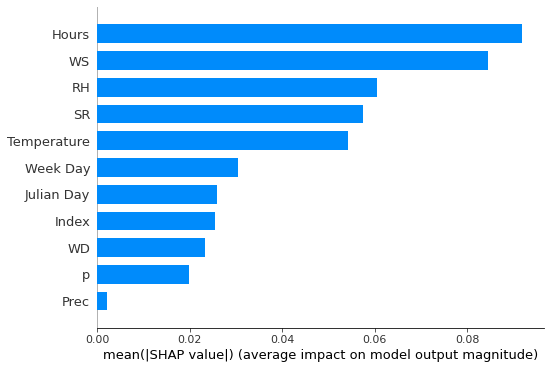

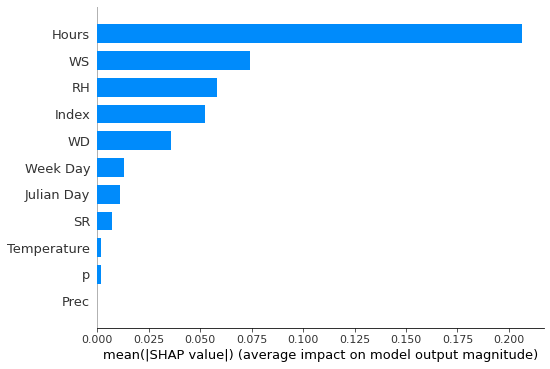

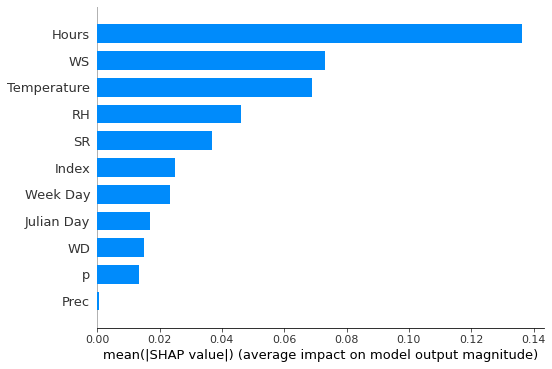

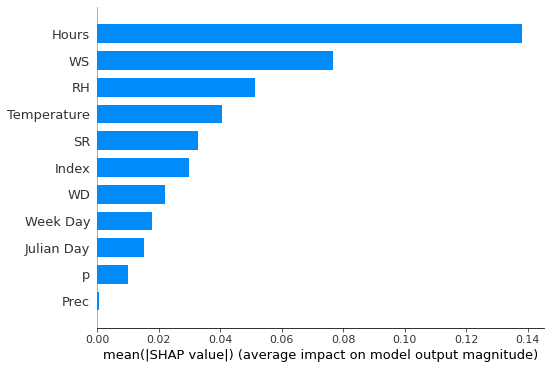

In [2]:
#NO2 with Ensemble 3  NO2
import shap
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
import tensorflow.keras.backend 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model
import shap
#load data
data_path= 'C:\\data\\PeakConcentration-Idea2-2-Clasification\\FullDay_Peak_Values\\'
Train_Path = data_path+'NO2_Train.csv'
Test_Path = data_path+'NO2_Test.csv'
x_train, y_train, x_test, y_test = Load_Train_Test(Train_Path,Test_Path)
#load model
Filenames=[]
Filenames.append('Saved_Models_top3_2\\3_EnsembleDL_NO2_model1.h5')
Filenames.append('Saved_Models_top3_2\\3_EnsembleDL_NO2_model2.h5')
Filenames.append('Saved_Models_top3_2\\3_EnsembleDL_NO2_model3.h5')

#setting SHAP 

tf.compat.v1.disable_v2_behavior()
tf.compat.v1.disable_eager_execution()
shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough
#load model
Model = Load_EnsembleDL(Filenames)
Test_Loading(Model, x_train, y_train, x_test, y_test)

model = Model.Models[0]
background = x_train
explainer = shap.DeepExplainer(model, background)
shap_vals1 = explainer.shap_values(x_test)
f_names = ['Index','Hours','Julian Day','Week Day','Temperature','SR','p','Prec','RH','WD','WS']
shap.summary_plot(shap_vals1[0][:,:,0],feature_names=f_names,  plot_type="bar")

model = Model.Models[1]
background = x_train
explainer = shap.DeepExplainer(model, background)
shap_vals2 = explainer.shap_values(x_test)
f_names = ['Index','Hours','Julian Day','Week Day','Temperature','SR','p','Prec','RH','WD','WS']
shap.summary_plot(shap_vals2[0][:,:,0],feature_names=f_names,  plot_type="bar")

model = Model.Models[2]
background = x_train
explainer = shap.DeepExplainer(model, background)
shap_vals3 = explainer.shap_values(x_test)
f_names = ['Index','Hours','Julian Day','Week Day','Temperature','SR','p','Prec','RH','WD','WS']
shap.summary_plot(shap_vals3[0][:,:,0],feature_names=f_names,  plot_type="bar")

x1 = shap_vals1[0][:,:,0]
x2 = shap_vals2[0][:,:,0]
x3 = shap_vals3[0][:,:,0]
x= (x1+x2+x3)/3
shap.summary_plot(x,feature_names=f_names,  plot_type="bar")


size before appling reshape:  (2906, 11) (2906,) (730, 11) (730,)
size after appling reshape:  (2906, 11, 1) (2906, 1) (730, 11, 1) (730, 1)
Load submodel  1  from  Saved_Models_top3_2\3_EnsembleDL_CO_model1.h5
Load submodel  2  from  Saved_Models_top3_2\3_EnsembleDL_CO_model2.h5
Load submodel  3  from  Saved_Models_top3_2\3_EnsembleDL_CO_model3.h5
Load Ensemble DL Done...
Ensemble Results: 
Train: 
precision: 	 0.8586666666666667
recall:    	 0.8864418444597385
F score:   	 0.8723332204537758
AUC score: 	 0.8702684101858226
Test: 
precision: 	 0.7877237851662404
recall:    	 0.8438356164383561
F score:   	 0.8148148148148149
AUC score: 	 0.8082191780821918
Done


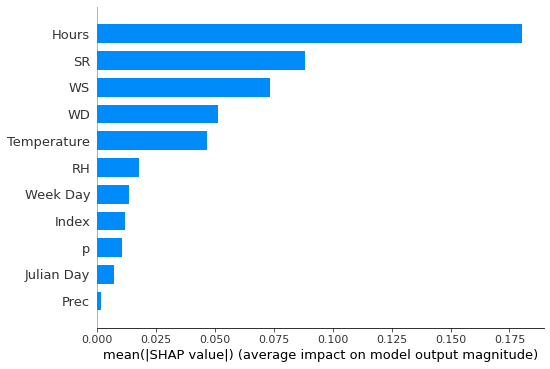

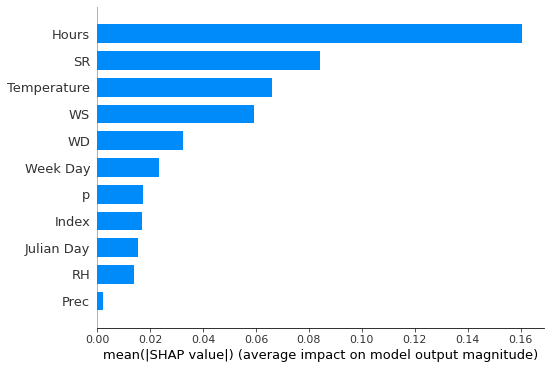

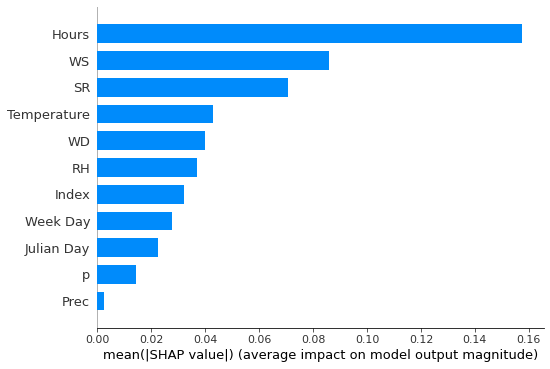

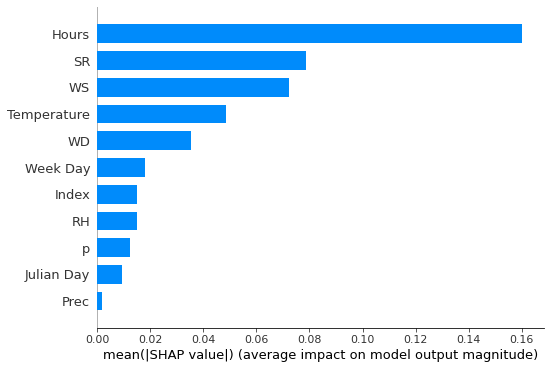

In [3]:
#NO2 with Ensemble 3  CO
import shap
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
import tensorflow.keras.backend 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model
import shap
#load data
data_path= 'C:\\data\\PeakConcentration-Idea2-2-Clasification\\FullDay_Peak_Values\\'
Train_Path = data_path+'CO_Train.csv'
Test_Path = data_path+'CO_Test.csv'
x_train, y_train, x_test, y_test = Load_Train_Test(Train_Path,Test_Path)
#load model
Filenames=[]
Filenames.append('Saved_Models_top3_2\\3_EnsembleDL_CO_model1.h5')
Filenames.append('Saved_Models_top3_2\\3_EnsembleDL_CO_model2.h5')
Filenames.append('Saved_Models_top3_2\\3_EnsembleDL_CO_model3.h5')

#setting SHAP 

tf.compat.v1.disable_v2_behavior()
tf.compat.v1.disable_eager_execution()
shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough
#load model
Model = Load_EnsembleDL(Filenames)
Test_Loading(Model, x_train, y_train, x_test, y_test)

model = Model.Models[0]
background = x_train
explainer = shap.DeepExplainer(model, background)
shap_vals1 = explainer.shap_values(x_test)
f_names = ['Index','Hours','Julian Day','Week Day','Temperature','SR','p','Prec','RH','WD','WS']
shap.summary_plot(shap_vals1[0][:,:,0],feature_names=f_names,  plot_type="bar")

model = Model.Models[1]
background = x_train
explainer = shap.DeepExplainer(model, background)
shap_vals2 = explainer.shap_values(x_test)
f_names = ['Index','Hours','Julian Day','Week Day','Temperature','SR','p','Prec','RH','WD','WS']
shap.summary_plot(shap_vals2[0][:,:,0],feature_names=f_names,  plot_type="bar")

model = Model.Models[2]
background = x_train
explainer = shap.DeepExplainer(model, background)
shap_vals3 = explainer.shap_values(x_test)
f_names = ['Index','Hours','Julian Day','Week Day','Temperature','SR','p','Prec','RH','WD','WS']
shap.summary_plot(shap_vals3[0][:,:,0],feature_names=f_names,  plot_type="bar")

x1 = shap_vals1[0][:,:,0]
x2 = shap_vals2[0][:,:,0]
x3 = shap_vals3[0][:,:,0]
x= (x1+x2+x3)/3
shap.summary_plot(x,feature_names=f_names,  plot_type="bar")


size before appling reshape:  (2908, 11) (2908,) (730, 11) (730,)
size after appling reshape:  (2908, 11, 1) (2908, 1) (730, 11, 1) (730, 1)
Load submodel  1  from  Saved_Models_top3_2\2_EnsembleDL_O3_model1.h5
Load submodel  2  from  Saved_Models_top3_2\2_EnsembleDL_O3_model2.h5
Load submodel  3  from  Saved_Models_top3_2\2_EnsembleDL_O3_model3.h5
Load Ensemble DL Done...
Ensemble Results: 
Train: 
precision: 	 0.8557213930348259
recall:    	 0.9463548830811555
F score:   	 0.898758981058132
AUC score: 	 0.8933975240715268
Test: 
precision: 	 0.8438287153652393
recall:    	 0.9178082191780822
F score:   	 0.879265091863517
AUC score: 	 0.8739726027397261
Done


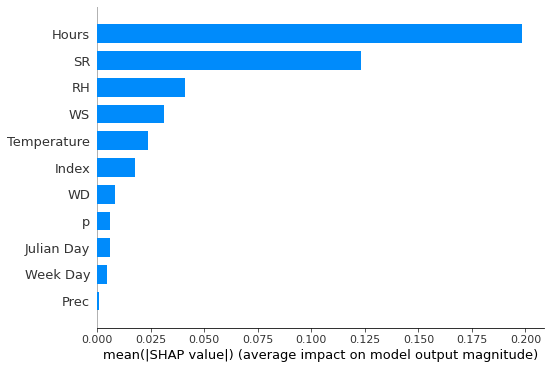

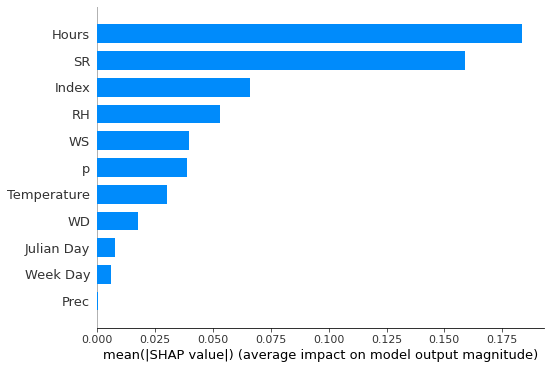

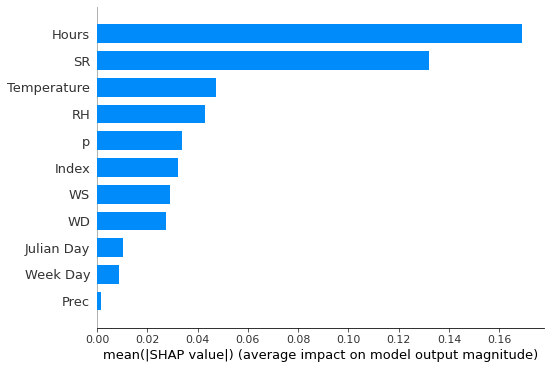

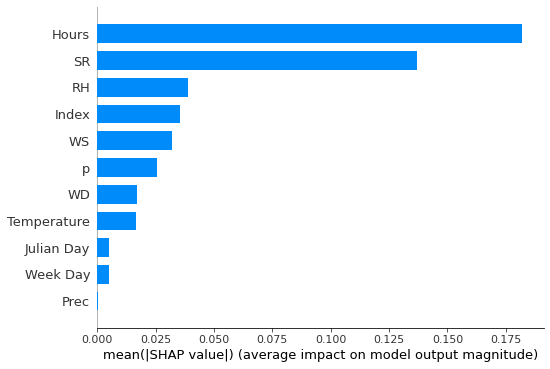

In [4]:
#NO2 with Ensemble 2  O3
import shap
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
import tensorflow.keras.backend 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model
import shap
#load data
data_path= 'C:\\data\\PeakConcentration-Idea2-2-Clasification\\FullDay_Peak_Values\\'
Train_Path = data_path+'O3_Train.csv'
Test_Path = data_path+'O3_Test.csv'
x_train, y_train, x_test, y_test = Load_Train_Test(Train_Path,Test_Path)
#load model
Filenames=[]
Filenames.append('Saved_Models_top3_2\\2_EnsembleDL_O3_model1.h5')
Filenames.append('Saved_Models_top3_2\\2_EnsembleDL_O3_model2.h5')
Filenames.append('Saved_Models_top3_2\\2_EnsembleDL_O3_model3.h5')

#setting SHAP 

tf.compat.v1.disable_v2_behavior()
tf.compat.v1.disable_eager_execution()
shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough
#load model
Model = Load_EnsembleDL(Filenames)
Test_Loading(Model, x_train, y_train, x_test, y_test)

model = Model.Models[0]
background = x_train
explainer = shap.DeepExplainer(model, background)
shap_vals1 = explainer.shap_values(x_test)
f_names = ['Index','Hours','Julian Day','Week Day','Temperature','SR','p','Prec','RH','WD','WS']
shap.summary_plot(shap_vals1[0][:,:,0],feature_names=f_names,  plot_type="bar")

model = Model.Models[1]
background = x_train
explainer = shap.DeepExplainer(model, background)
shap_vals2 = explainer.shap_values(x_test)
f_names = ['Index','Hours','Julian Day','Week Day','Temperature','SR','p','Prec','RH','WD','WS']
shap.summary_plot(shap_vals2[0][:,:,0],feature_names=f_names,  plot_type="bar")

model = Model.Models[2]
background = x_train
explainer = shap.DeepExplainer(model, background)
shap_vals3 = explainer.shap_values(x_test)
f_names = ['Index','Hours','Julian Day','Week Day','Temperature','SR','p','Prec','RH','WD','WS']
shap.summary_plot(shap_vals3[0][:,:,0],feature_names=f_names,  plot_type="bar")

x1 = shap_vals1[0][:,:,0]
x2 = shap_vals2[0][:,:,0]
x3 = shap_vals3[0][:,:,0]
x= (x1+x2+x3)/3
shap.summary_plot(x,feature_names=f_names,  plot_type="bar")


size before appling reshape:  (2899, 11) (2899,) (728, 11) (728,)
size after appling reshape:  (2899, 11, 1) (2899, 1) (728, 11, 1) (728, 1)
Load submodel  1  from  Saved_Models_top3_2\4_EnsembleDL_PM2_5_model1.h5
Load submodel  2  from  Saved_Models_top3_2\4_EnsembleDL_PM2_5_model2.h5
Load submodel  3  from  Saved_Models_top3_2\4_EnsembleDL_PM2_5_model3.h5
Load Ensemble DL Done...
Ensemble Results: 
Train: 
precision: 	 0.8040345821325648
recall:    	 0.7696551724137931
F score:   	 0.7864693446088794
AUC score: 	 0.7909697532186288
Test: 
precision: 	 0.7507692307692307
recall:    	 0.6703296703296703
F score:   	 0.7082728592162554
AUC score: 	 0.7239010989010989
Done


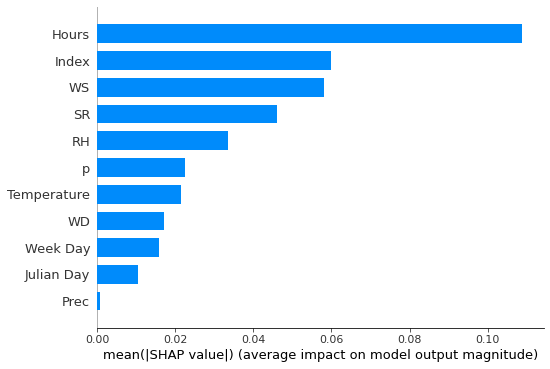

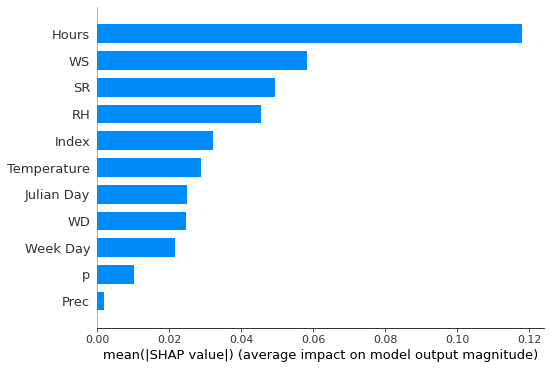

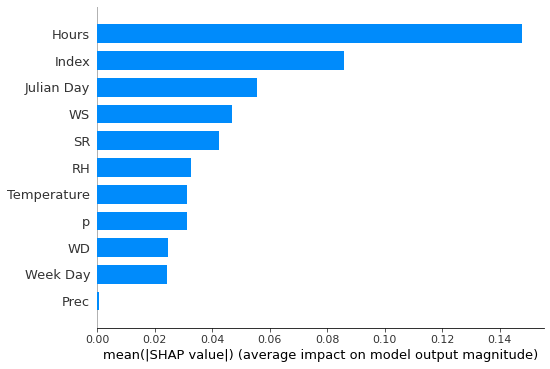

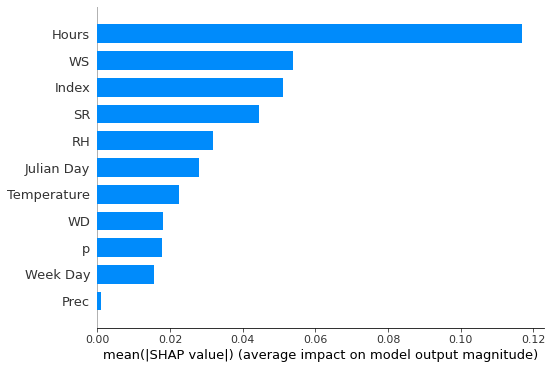

In [5]:
#NO2 with Ensemble 4  PM2.5
import shap
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
import tensorflow.keras.backend 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model
import shap
#load data
data_path= 'C:\\data\\PeakConcentration-Idea2-2-Clasification\\FullDay_Peak_Values\\'
Train_Path = data_path+'PM2_5_Train.csv'
Test_Path = data_path+'PM2_5_Test.csv'
x_train, y_train, x_test, y_test = Load_Train_Test(Train_Path,Test_Path)
#load model
Filenames=[]
Filenames.append('Saved_Models_top3_2\\4_EnsembleDL_PM2_5_model1.h5')
Filenames.append('Saved_Models_top3_2\\4_EnsembleDL_PM2_5_model2.h5')
Filenames.append('Saved_Models_top3_2\\4_EnsembleDL_PM2_5_model3.h5')

#setting SHAP 

tf.compat.v1.disable_v2_behavior()
tf.compat.v1.disable_eager_execution()
shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough
#load model
Model = Load_EnsembleDL(Filenames)
Test_Loading(Model, x_train, y_train, x_test, y_test)

model = Model.Models[0]
background = x_train
explainer = shap.DeepExplainer(model, background)
shap_vals1 = explainer.shap_values(x_test)
f_names = ['Index','Hours','Julian Day','Week Day','Temperature','SR','p','Prec','RH','WD','WS']
shap.summary_plot(shap_vals1[0][:,:,0],feature_names=f_names,  plot_type="bar")

model = Model.Models[1]
background = x_train
explainer = shap.DeepExplainer(model, background)
shap_vals2 = explainer.shap_values(x_test)
f_names = ['Index','Hours','Julian Day','Week Day','Temperature','SR','p','Prec','RH','WD','WS']
shap.summary_plot(shap_vals2[0][:,:,0],feature_names=f_names,  plot_type="bar")

model = Model.Models[2]
background = x_train
explainer = shap.DeepExplainer(model, background)
shap_vals3 = explainer.shap_values(x_test)
f_names = ['Index','Hours','Julian Day','Week Day','Temperature','SR','p','Prec','RH','WD','WS']
shap.summary_plot(shap_vals3[0][:,:,0],feature_names=f_names,  plot_type="bar")

x1 = shap_vals1[0][:,:,0]
x2 = shap_vals2[0][:,:,0]
x3 = shap_vals3[0][:,:,0]
x= (x1+x2+x3)/3
shap.summary_plot(x,feature_names=f_names,  plot_type="bar")


size before appling reshape:  (2880, 11) (2880,) (728, 11) (728,)
size after appling reshape:  (2880, 11, 1) (2880, 1) (728, 11, 1) (728, 1)
Load submodel  1  from  Saved_Models_top3_2\2_EnsembleDL_SO2_model1.h5
Load submodel  2  from  Saved_Models_top3_2\2_EnsembleDL_SO2_model2.h5
Load submodel  3  from  Saved_Models_top3_2\2_EnsembleDL_SO2_model3.h5
Load Ensemble DL Done...
Ensemble Results: 
Train: 
precision: 	 0.7915492957746478
recall:    	 0.7805555555555556
F score:   	 0.786013986013986
AUC score: 	 0.7875
Test: 
precision: 	 0.7440476190476191
recall:    	 0.6868131868131868
F score:   	 0.7142857142857143
AUC score: 	 0.7252747252747253
Done


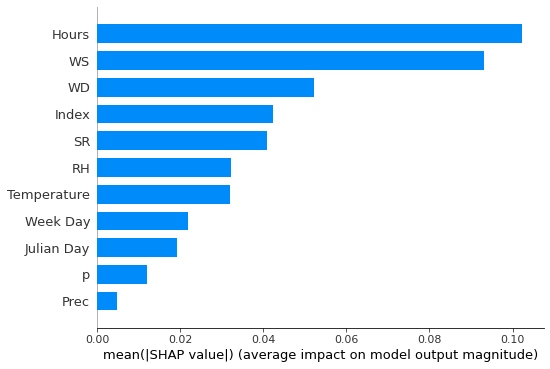

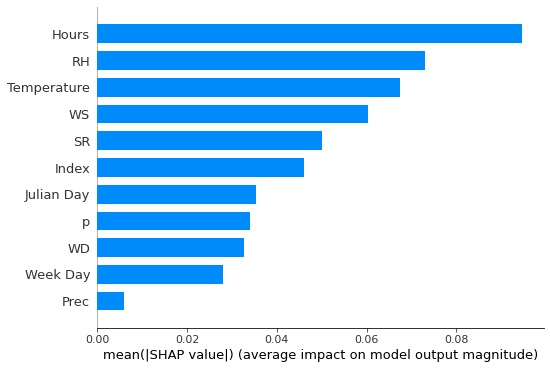

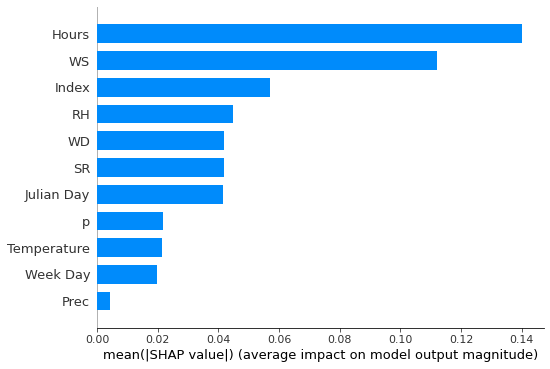

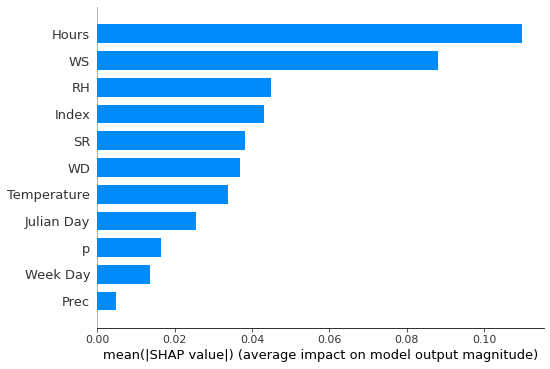

In [6]:
#NO2 with Ensemble 2  SO2
import shap
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
import tensorflow.keras.backend 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model
import shap
#load data
data_path= 'C:\\data\\PeakConcentration-Idea2-2-Clasification\\FullDay_Peak_Values\\'
Train_Path = data_path+'SO2_Train.csv'
Test_Path = data_path+'SO2_Test.csv'
x_train, y_train, x_test, y_test = Load_Train_Test(Train_Path,Test_Path)
#load model
Filenames=[]
Filenames.append('Saved_Models_top3_2\\2_EnsembleDL_SO2_model1.h5')
Filenames.append('Saved_Models_top3_2\\2_EnsembleDL_SO2_model2.h5')
Filenames.append('Saved_Models_top3_2\\2_EnsembleDL_SO2_model3.h5')

#setting SHAP 

tf.compat.v1.disable_v2_behavior()
tf.compat.v1.disable_eager_execution()
shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough
#load model
Model = Load_EnsembleDL(Filenames)
Test_Loading(Model, x_train, y_train, x_test, y_test)

model = Model.Models[0]
background = x_train
explainer = shap.DeepExplainer(model, background)
shap_vals1 = explainer.shap_values(x_test)
f_names = ['Index','Hours','Julian Day','Week Day','Temperature','SR','p','Prec','RH','WD','WS']
shap.summary_plot(shap_vals1[0][:,:,0],feature_names=f_names,  plot_type="bar")

model = Model.Models[1]
background = x_train
explainer = shap.DeepExplainer(model, background)
shap_vals2 = explainer.shap_values(x_test)
f_names = ['Index','Hours','Julian Day','Week Day','Temperature','SR','p','Prec','RH','WD','WS']
shap.summary_plot(shap_vals2[0][:,:,0],feature_names=f_names,  plot_type="bar")

model = Model.Models[2]
background = x_train
explainer = shap.DeepExplainer(model, background)
shap_vals3 = explainer.shap_values(x_test)
f_names = ['Index','Hours','Julian Day','Week Day','Temperature','SR','p','Prec','RH','WD','WS']
shap.summary_plot(shap_vals3[0][:,:,0],feature_names=f_names,  plot_type="bar")

x1 = shap_vals1[0][:,:,0]
x2 = shap_vals2[0][:,:,0]
x3 = shap_vals3[0][:,:,0]
x= (x1+x2+x3)/3
shap.summary_plot(x,feature_names=f_names,  plot_type="bar")
